# Iteration 4 (1)

In [16]:
train_dir = "Data Set Ordered/training data/"
val_dir = "Data Set Ordered/validation data/"
test_dir = "Data Set Ordered/test data/"

What do we want to do? Regularization!

How?
- More data
- - data augmentation
- - Oversample/undersample
- - Class weight in loss function

What?
- We first try data augmentation - question is how should we distribute the number of pictures per class. 
- - We choose equal dist but we expect that some classes will overfit as we over sample from 200-7000

In [17]:
from homemade_dataloader import HomemadeDataloader
from keras.applications.mobilenet_v3 import preprocess_input
# Directories for each class
project_dir = "/content/gdrive/MyDrive/DeepLearning Project/" #removed space in "My Drive"
project_dir=""
train_dir = project_dir + 'Data Set Ordered/training data/'
validation_dir = project_dir + 'Data Set Ordered/validation data/'
test_dir = project_dir + 'Data Set Ordered/test data/'

dist = [3000, 7000, 1500, 1500, 3000, 1500, 1500]
batch_size = 32
epochs = 100

train_generator = HomemadeDataloader(train_dir, batch_size, (224,224), isValidation=False, preprocess_function=preprocess_input, class_distribuition= dist)

validation_generator = HomemadeDataloader(validation_dir, batch_size, (224,224), isValidation=True, preprocess_function=preprocess_input)

test_generator = HomemadeDataloader(test_dir, batch_size, (224,224), isValidation=True, preprocess_function=preprocess_input)

ImportError: cannot import name 'HomemadeDataloader' from 'homemade_dataloader' (/Users/sebastiangodske/proj/deep_learning_group2/homemade_dataloader.py)

In [ ]:
model = CustomModel(number_of_samples=train_generator.samples)

model.compile()

In [ ]:
model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path='models/best_model_iteration_4.h5')

Epoch 1/5
593/593 [==============================] - ETA: 0s - loss: 1.6550 - accuracy: 0.4547
Epoch 1: val_loss improved from inf to 1.17533, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 200s 333ms/step - loss: 1.6550 - accuracy: 0.4547 - val_loss: 1.1753 - val_accuracy: 0.5781
Epoch 2/5
593/593 [==============================] - ETA: 0s - loss: 1.3596 - accuracy: 0.5380
Epoch 2: val_loss improved from 1.17533 to 0.87025, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 192s 324ms/step - loss: 1.3596 - accuracy: 0.5380 - val_loss: 0.8702 - val_accuracy: 0.7240
Epoch 3/5
593/593 [==============================] - ETA: 0s - loss: 1.2802 - accuracy: 0.5591
Epoch 3: val_loss did not improve from 0.87025
593/593 [==============================] - 192s 324ms/step - loss: 1.2802 - accuracy: 0.5591 - val_loss: 1.0657 - val_accuracy: 0.6719
Epoch 4/5
593/593 [==============================] - ETA: 0s - lo

All layers have been unfrozen.
Epoch 1/5
593/593 [==============================] - 201s 333ms/step - loss: 1.8601 - accuracy: 0.4826 - val_loss: 1.1274 - val_accuracy: 0.7135
Epoch 2/5
593/593 [==============================] - 195s 328ms/step - loss: 1.3626 - accuracy: 0.5520 - val_loss: 1.2457 - val_accuracy: 0.6406
Epoch 3/5
593/593 [==============================] - 194s 326ms/step - loss: 1.0893 - accuracy: 0.6083 - val_loss: 0.9731 - val_accuracy: 0.7031
Epoch 4/5
593/593 [==============================] - 195s 329ms/step - loss: 0.9577 - accuracy: 0.6449 - val_loss: 0.8570 - val_accuracy: 0.7135
Epoch 5/5
593/593 [==============================] - 196s 330ms/step - loss: 0.8978 - accuracy: 0.6607 - val_loss: 0.6637 - val_accuracy: 0.7552


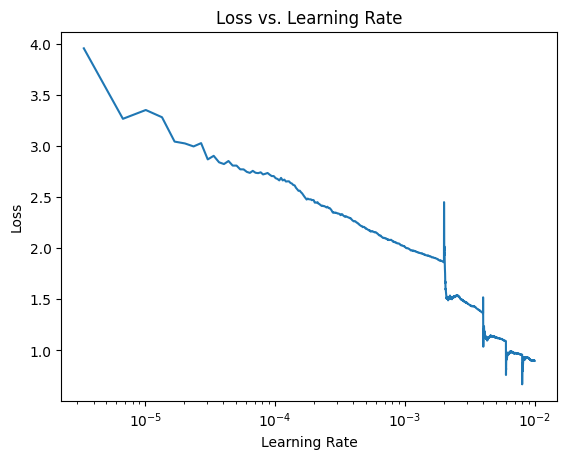

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator,epochs=5)

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path='models/best_model_iteration_4.h5', lr=[7e-5, 2e-2])

Epoch 1/50
593/593 [==============================] - ETA: 0s - loss: 0.8145 - accuracy: 0.6866
Epoch 1: val_loss improved from inf to 0.65871, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 195s 328ms/step - loss: 0.8145 - accuracy: 0.6866 - val_loss: 0.6587 - val_accuracy: 0.7448
Epoch 2/50
593/593 [==============================] - ETA: 0s - loss: 0.7888 - accuracy: 0.6970
Epoch 2: val_loss did not improve from 0.65871
593/593 [==============================] - 193s 326ms/step - loss: 0.7888 - accuracy: 0.6970 - val_loss: 0.8318 - val_accuracy: 0.7552
Epoch 3/50
593/593 [==============================] - ETA: 0s - loss: 0.7779 - accuracy: 0.7035
Epoch 3: val_loss did not improve from 0.65871
593/593 [==============================] - 193s 325ms/step - loss: 0.7779 - accuracy: 0.7035 - val_loss: 0.7307 - val_accuracy: 0.7708
Epoch 4/50
593/593 [==============================] - ETA: 0s - loss: 0.7682 - accuracy: 0.7091
Epoch 4: val_loss im

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accrucay: 0.5679935062244146
Accuracy on test set: 0.7706117033958435
F1 Score: 0.766196379167924


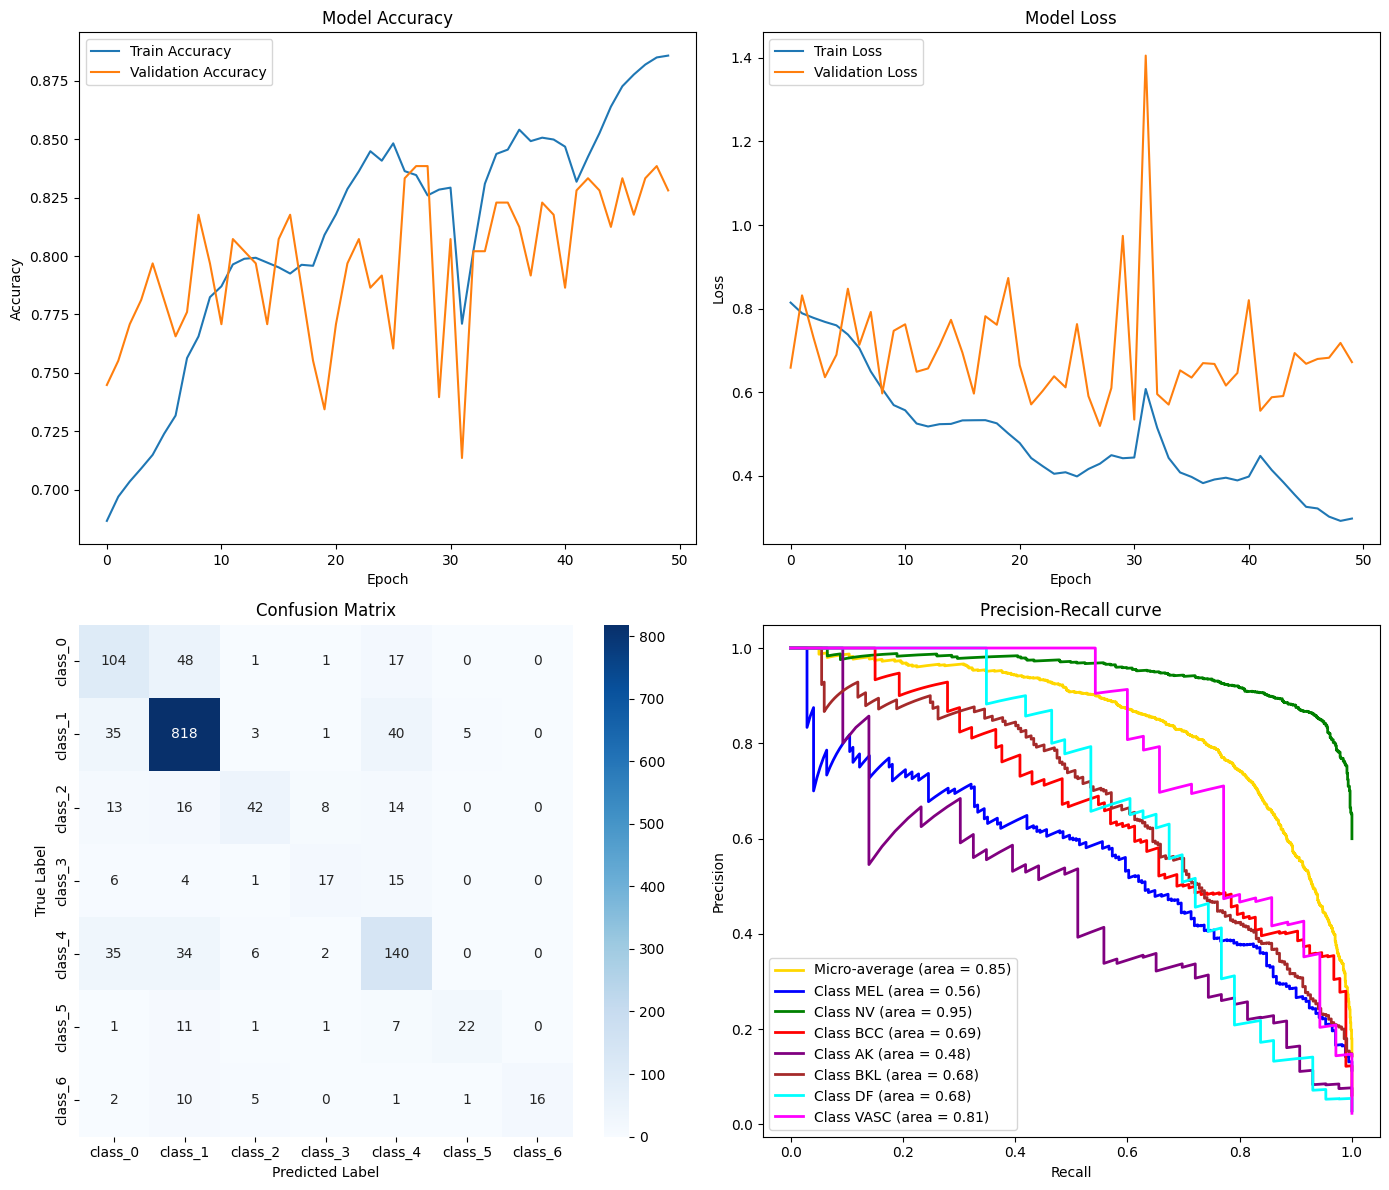

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('models/best_model_iteration_4.h5')

show_all_plots(history, model, test_generator)

### Test which augmentations should be valid

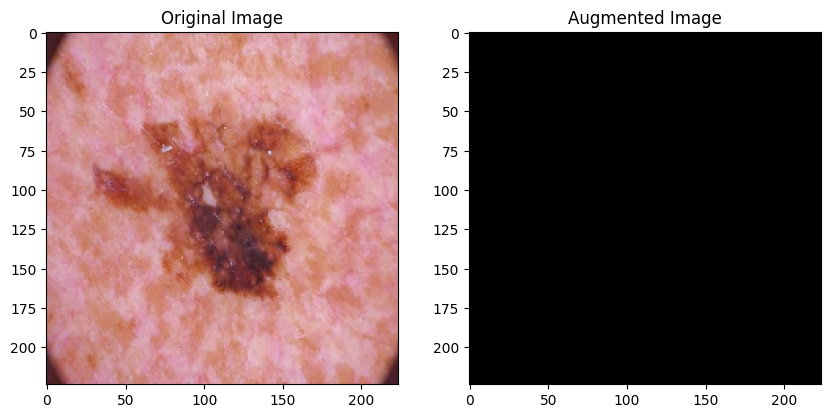

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Define the data generator with your specified augmentations
datagen = ImageDataGenerator(
)

#shear_range=50, widht/height 0.2, roation_range=360, brightness_range=[0.3, 1.8], channel_shift_range= random.uniform(20, 50),zoom_range=0.3,


def augment_and_display_image(image_path, datagen):
    # Load and preprocess the image
    image = load_img(image_path, target_size=(224, 224))
    input_array = img_to_array(image)  # Convert image to array
    input_array = np.expand_dims(input_array, 0)  # Add batch dimension

    # Generate an augmented image
    augmented_iter = datagen.flow(input_array, batch_size=1)
    augmented_image = next(augmented_iter)[0].astype('uint8')

    # Plot the original and augmented images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    
    plt.subplot(1, 2, 2)
    plt.imshow(augmented_image)
    plt.title("Augmented Image")
    plt.show()

# Example usage:
image_path = os.path.join(train_dir, "class_0/image_4.jpg")  # Replace with the actual image file path
augment_and_display_image(image_path, datagen)


# Iteration 4 (2)

In [ ]:
train_dir = "Data Set Ordered/training data/"
val_dir = "Data Set Ordered/validation data/"
test_dir = "Data Set Ordered/test data/"

What do we want to do? Regularization!

How?
- More data
- - data augmentation
- - Oversample/undersample
- - Class weight in loss function

What?
- We first try data augmentation - question is how should we distribute the number of pictures per class. 
- - We choose equal dist but we expect that some classes will overfit as we over sample from 200-7000

In [ ]:
from homemade_dataloader import HomemadeDataloader
from keras.applications.mobilenet_v3 import preprocess_input
# Directories for each class
project_dir = "/content/gdrive/MyDrive/DeepLearning Project/" #removed space in "My Drive"
project_dir=""
train_dir = project_dir + 'Data Set Ordered/training data/'
validation_dir = project_dir + 'Data Set Ordered/validation data/'
test_dir = project_dir + 'Data Set Ordered/test data/'

dist = [3000, 7000, 1500, 1500, 3000, 1500, 1500]
batch_size = 32
epochs = 100

train_generator = HomemadeDataloader(train_dir, batch_size, (224,224), isValidation=False, preprocess_function=preprocess_input, class_distribuition= dist)

validation_generator = HomemadeDataloader(validation_dir, batch_size, (224,224), isValidation=True, preprocess_function=preprocess_input)

test_generator = HomemadeDataloader(test_dir, batch_size, (224,224), isValidation=True, preprocess_function=preprocess_input)

Found 10015 images belonging to 7 classes (dist says 19000)
Found 193 images belonging to 7 classes (dist says 0)
Found 1512 images belonging to 7 classes (dist says 0)


In [ ]:
model = CustomModel(number_of_samples=train_generator.samples)

model.compile()

In [ ]:
model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path='models/best_model_iteration_4.h5')

Epoch 1/5
593/593 [==============================] - ETA: 0s - loss: 1.6516 - accuracy: 0.4591
Epoch 1: val_loss improved from inf to 1.01772, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 258s 424ms/step - loss: 1.6516 - accuracy: 0.4591 - val_loss: 1.0177 - val_accuracy: 0.6719
Epoch 2/5
593/593 [==============================] - ETA: 0s - loss: 1.3286 - accuracy: 0.5466
Epoch 2: val_loss improved from 1.01772 to 0.94710, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 192s 324ms/step - loss: 1.3286 - accuracy: 0.5466 - val_loss: 0.9471 - val_accuracy: 0.6979
Epoch 3/5
593/593 [==============================] - ETA: 0s - loss: 1.2652 - accuracy: 0.5617
Epoch 3: val_loss did not improve from 0.94710
593/593 [==============================] - 191s 322ms/step - loss: 1.2652 - accuracy: 0.5617 - val_loss: 0.9668 - val_accuracy: 0.6615
Epoch 4/5
593/593 [==============================] - ETA: 0s - lo

All layers have been unfrozen.
Epoch 1/5
593/593 [==============================] - 201s 331ms/step - loss: 1.8481 - accuracy: 0.4911 - val_loss: 1.2743 - val_accuracy: 0.6927
Epoch 2/5
593/593 [==============================] - 195s 329ms/step - loss: 1.3408 - accuracy: 0.5651 - val_loss: 0.8960 - val_accuracy: 0.7396
Epoch 3/5
593/593 [==============================] - 195s 329ms/step - loss: 1.0627 - accuracy: 0.6157 - val_loss: 0.8610 - val_accuracy: 0.7083
Epoch 4/5
593/593 [==============================] - 195s 328ms/step - loss: 0.9454 - accuracy: 0.6501 - val_loss: 0.6319 - val_accuracy: 0.7917
Epoch 5/5
593/593 [==============================] - 196s 330ms/step - loss: 0.8619 - accuracy: 0.6775 - val_loss: 0.8939 - val_accuracy: 0.7812


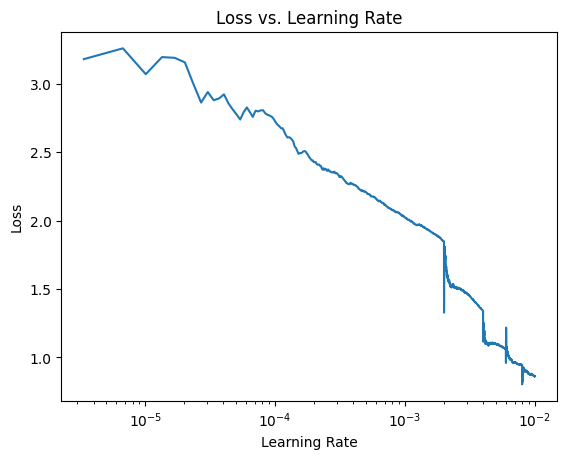

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator,epochs=5)

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=100, checkpoint_path='models/best_model_iteration_4.h5', lr=[7e-5, 2e-2])

Epoch 1/100
593/593 [==============================] - ETA: 0s - loss: 0.7830 - accuracy: 0.7061
Epoch 1: val_loss improved from inf to 0.84039, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 195s 328ms/step - loss: 0.7830 - accuracy: 0.7061 - val_loss: 0.8404 - val_accuracy: 0.7604
Epoch 2/100
593/593 [==============================] - ETA: 0s - loss: 0.7594 - accuracy: 0.7145
Epoch 2: val_loss improved from 0.84039 to 0.79117, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 193s 326ms/step - loss: 0.7594 - accuracy: 0.7145 - val_loss: 0.7912 - val_accuracy: 0.7812
Epoch 3/100
593/593 [==============================] - ETA: 0s - loss: 0.7419 - accuracy: 0.7151
Epoch 3: val_loss did not improve from 0.79117
593/593 [==============================] - 193s 325ms/step - loss: 0.7419 - accuracy: 0.7151 - val_loss: 0.8913 - val_accuracy: 0.7656
Epoch 4/100
593/593 [==============================] - ETA:

Balanced Accrucay: 0.6227668517633226
Accuracy on test set: 0.7832446694374084
F1 Score: 0.7811501257340174


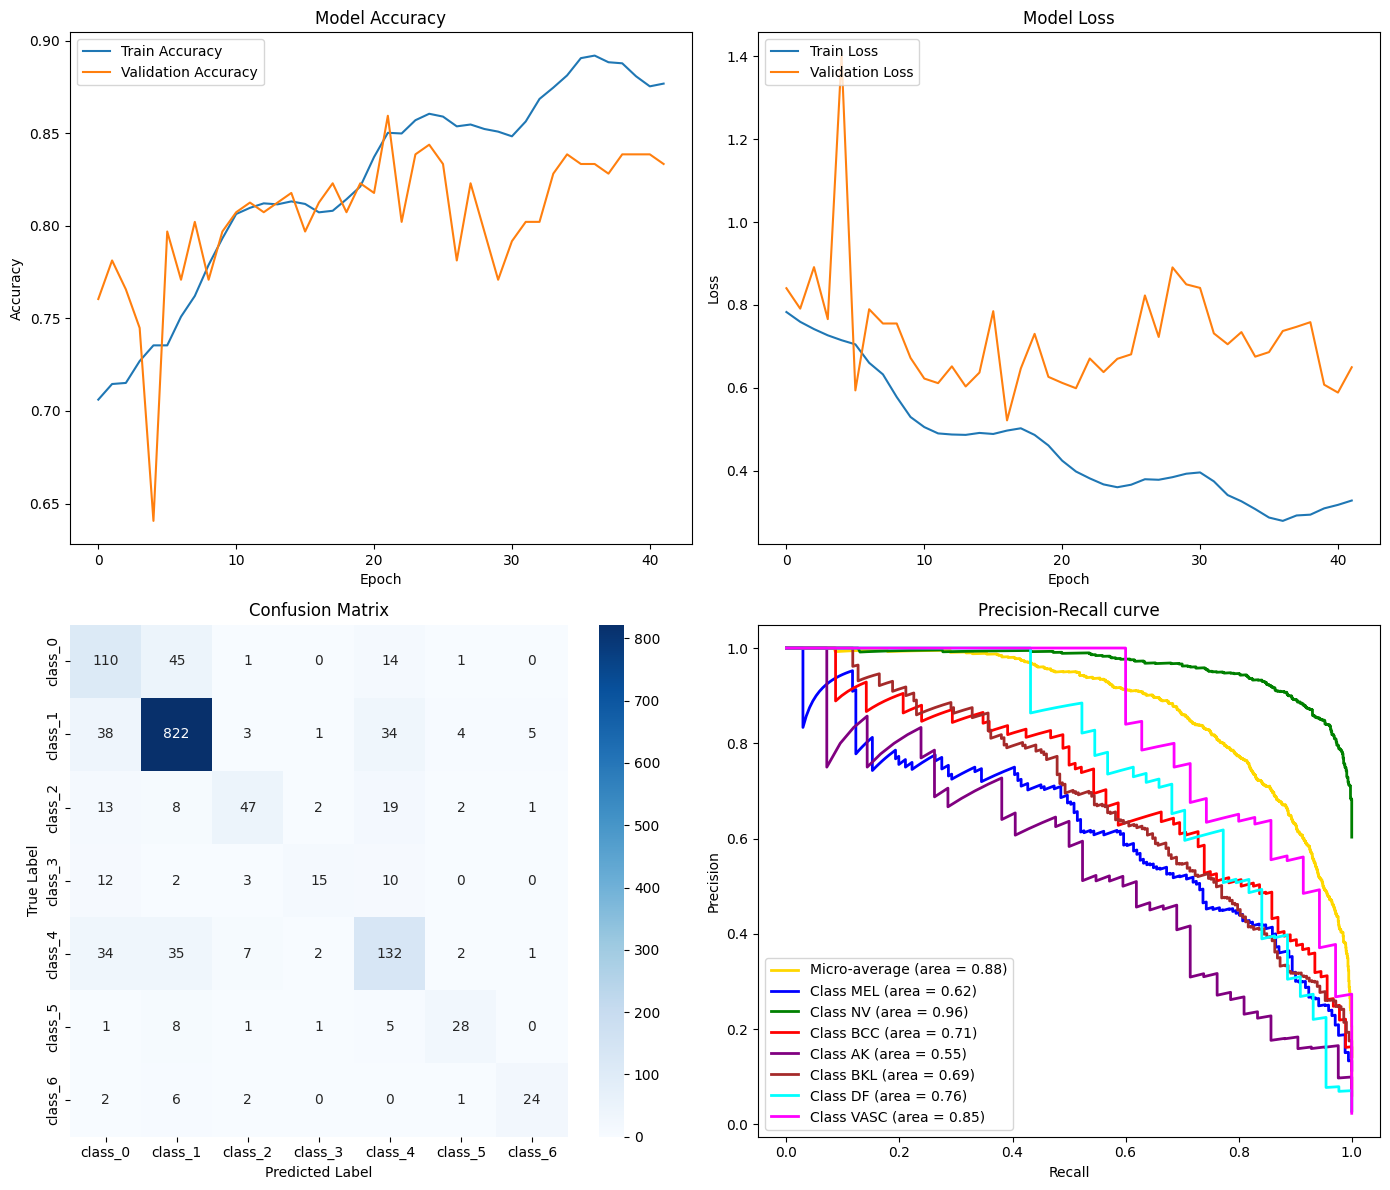

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('models/best_model_iteration_4.h5')

show_all_plots(history, model, test_generator)

# Iteration 4 (3)

In [ ]:
import tensorflow as tf
print("Available devices:", tf.config.list_physical_devices())


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
train_dir = "Data Set Ordered/training data/"
val_dir = "Data Set Ordered/validation data/"
test_dir = "Data Set Ordered/test data/"

What do we want to do? Regularization!

How?
- More data
- - data augmentation
- - Oversample/undersample
- - Class weight in loss function

What?
- We first try data augmentation - question is how should we distribute the number of pictures per class. 
- - We choose equal dist but we expect that some classes will overfit as we over sample from 200-7000

In [ ]:
from homemade_dataloader import HomemadeDataloader
from keras.applications.mobilenet_v3 import preprocess_input
# Directories for each class
project_dir = "/content/gdrive/MyDrive/DeepLearning Project/" #removed space in "My Drive"
project_dir=""
train_dir = project_dir + 'Data Set Ordered/training data/'
validation_dir = project_dir + 'Data Set Ordered/validation data/'
test_dir = project_dir + 'Data Set Ordered/test data/'

dist = [3000, 7000, 1500, 1500, 3000, 1500, 1500]
batch_size = 32
epochs = 100

train_generator = HomemadeDataloader(train_dir, batch_size, (224,224), isValidation=False, preprocess_function=preprocess_input, class_distribuition= dist)

validation_generator = HomemadeDataloader(validation_dir, batch_size, (224,224), isValidation=True, preprocess_function=preprocess_input)

test_generator = HomemadeDataloader(test_dir, batch_size, (224,224), isValidation=True, preprocess_function=preprocess_input)

Found 10015 images belonging to 7 classes (dist says 19000)
Found 193 images belonging to 7 classes (dist says 0)
Found 1512 images belonging to 7 classes (dist says 0)


In [ ]:
model = CustomModel(number_of_samples=train_generator.samples)

model.compile()

In [ ]:
model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path='models/best_model_iteration_4.h5')

Epoch 1/5
593/593 [==============================] - ETA: 0s - loss: 1.6315 - accuracy: 0.4575
Epoch 1: val_loss improved from inf to 1.23172, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 198s 331ms/step - loss: 1.6315 - accuracy: 0.4575 - val_loss: 1.2317 - val_accuracy: 0.6042
Epoch 2/5
593/593 [==============================] - ETA: 0s - loss: 1.3243 - accuracy: 0.5457
Epoch 2: val_loss improved from 1.23172 to 0.86346, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 193s 326ms/step - loss: 1.3243 - accuracy: 0.5457 - val_loss: 0.8635 - val_accuracy: 0.7448
Epoch 3/5
593/593 [==============================] - ETA: 0s - loss: 1.2541 - accuracy: 0.5695
Epoch 3: val_loss did not improve from 0.86346
593/593 [==============================] - 193s 326ms/step - loss: 1.2541 - accuracy: 0.5695 - val_loss: 0.8885 - val_accuracy: 0.7448
Epoch 4/5
593/593 [==============================] - ETA: 0s - lo

All layers have been unfrozen.
Epoch 1/5
593/593 [==============================] - 206s 341ms/step - loss: 1.8413 - accuracy: 0.4921 - val_loss: 1.0294 - val_accuracy: 0.7448
Epoch 2/5
593/593 [==============================] - 199s 335ms/step - loss: 1.3124 - accuracy: 0.5754 - val_loss: 0.8354 - val_accuracy: 0.7552
Epoch 3/5
593/593 [==============================] - 197s 333ms/step - loss: 1.0493 - accuracy: 0.6209 - val_loss: 1.1241 - val_accuracy: 0.6875
Epoch 4/5
593/593 [==============================] - 197s 332ms/step - loss: 0.9223 - accuracy: 0.6562 - val_loss: 0.9798 - val_accuracy: 0.6927
Epoch 5/5
593/593 [==============================] - 198s 333ms/step - loss: 0.8600 - accuracy: 0.6754 - val_loss: 0.8989 - val_accuracy: 0.7031


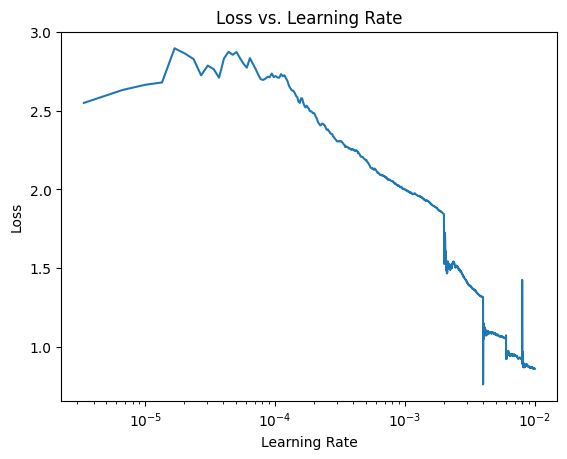

In [ ]:
model.unfreeze()
model.lr_find(train_generator, validation_generator,epochs=5)

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=100, checkpoint_path='models/best_model_iteration_4.h5', lr=[1e-4, 1e-3])

Epoch 1/100
593/593 [==============================] - ETA: 0s - loss: 0.8070 - accuracy: 0.6963
Epoch 1: val_loss improved from inf to 0.76371, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 202s 340ms/step - loss: 0.8070 - accuracy: 0.6963 - val_loss: 0.7637 - val_accuracy: 0.7292
Epoch 2/100
593/593 [==============================] - ETA: 0s - loss: 0.7747 - accuracy: 0.7054
Epoch 2: val_loss improved from 0.76371 to 0.71736, saving model to models\best_model_iteration_4.h5
593/593 [==============================] - 203s 342ms/step - loss: 0.7747 - accuracy: 0.7054 - val_loss: 0.7174 - val_accuracy: 0.7604
Epoch 3/100
593/593 [==============================] - ETA: 0s - loss: 0.7635 - accuracy: 0.7130
Epoch 3: val_loss did not improve from 0.71736
593/593 [==============================] - 201s 339ms/step - loss: 0.7635 - accuracy: 0.7130 - val_loss: 0.7397 - val_accuracy: 0.7240
Epoch 4/100
593/593 [==============================] - ETA:

Balanced Accrucay: 0.5392031153292153
Accuracy on test set: 0.7626329660415649
F1 Score: 0.7528799003070378


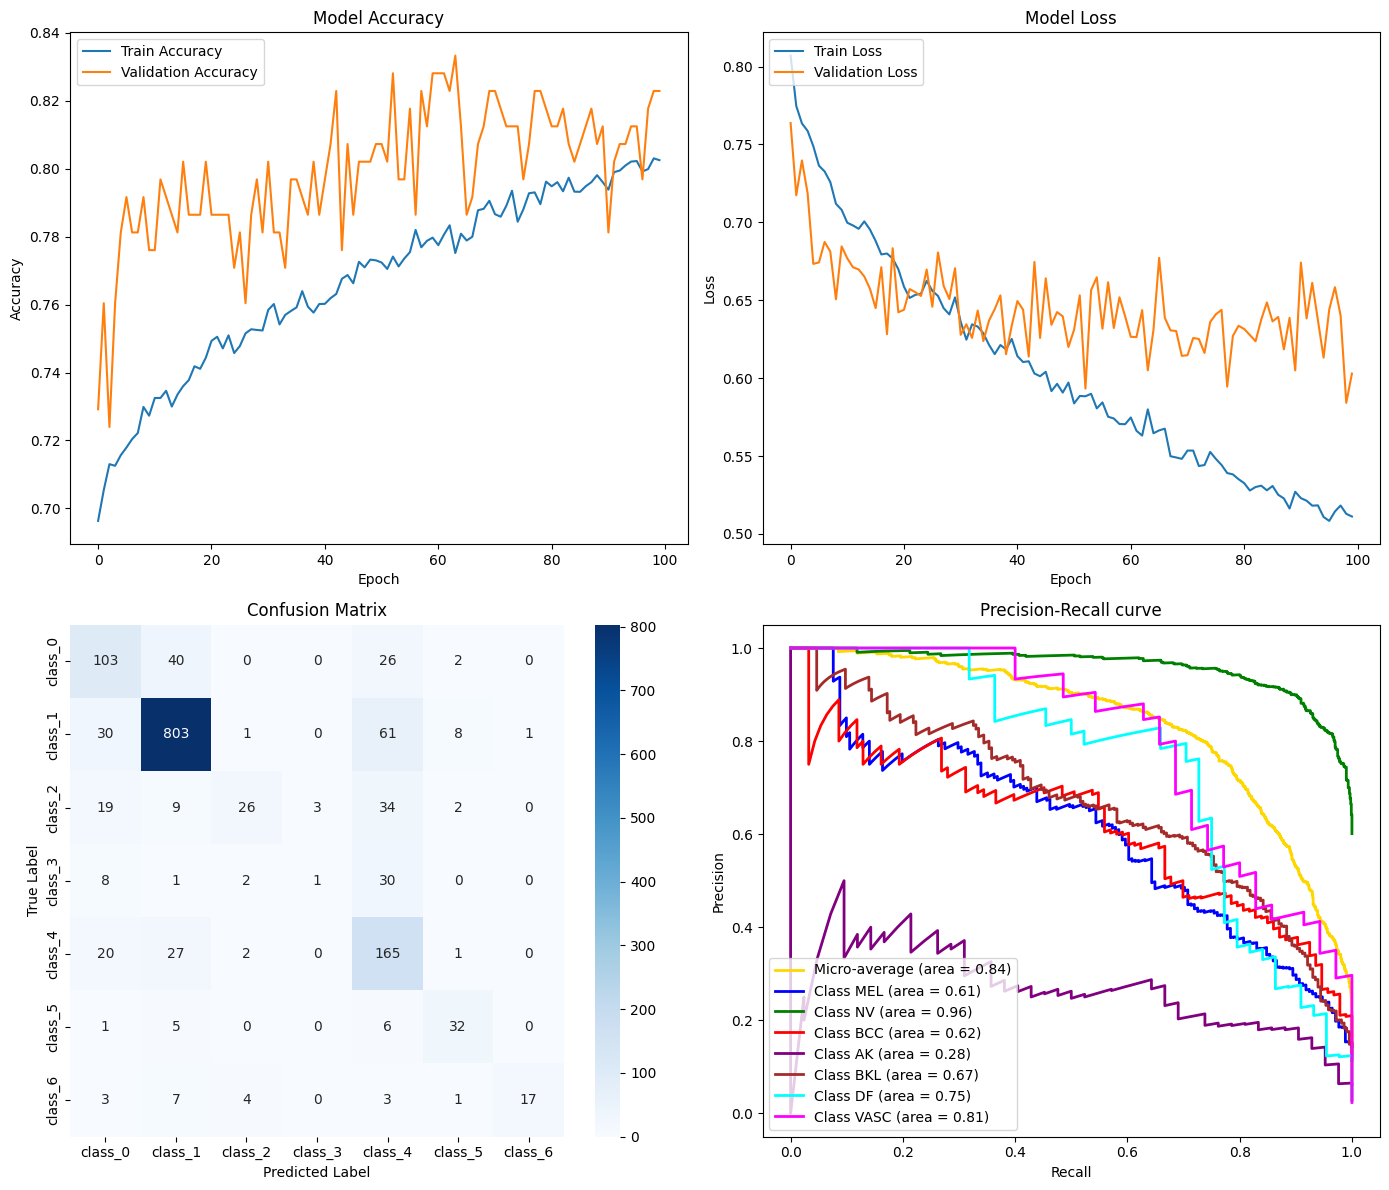

In [ ]:
from tensorflow.keras.models import load_model

m = load_model('models/best_model_iteration_4.h5')

show_all_plots(history, m, test_generator)

In [ ]:
history = model.fit_epochs(train_generator, validation_generator, epochs=100, checkpoint_path='models/best_model_iteration_4_5.h5', lr=[1e-4, 1e-3])

AttributeError: 'Functional' object has no attribute 'fit_epochs'

# Iteration 4 (5)

In [1]:
import sys
import os
from keras.applications.mobilenet_v3 import preprocess_input
# Add the project directory to the system path
sys.path.append(os.path.abspath(".."))

# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory

data_dir = "../Merge Set Ordered"
batch_size=32
dist = [1113,6705,514,327,1099,115,142]
print(sum(dist))

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Training set
Found 8202 images belonging to 7 classes (dist says 18900)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [2]:
import numpy as np
class_names = ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']

def print_sample_distribution(dataloader, class_names):
    """Print the distribution of samples per class for each batch and overall."""

    # Initialize total counts for all classes
    total_class_counts = {class_name: 0 for class_name in class_names}

    # Per-batch distribution
    print("\nDistribution of samples per class for each batch:")
    print("Number of batches:", len(dataloader))
    for batch_idx in range(len(dataloader)):
        # Fetch batch data
        img, labels = dataloader[batch_idx]

        # Count occurrences of each class in the batch
        batch_class_counts = {class_name: 0 for class_name in class_names}
        for label_vector in labels:
            class_index = np.argmax(label_vector)  # Convert one-hot to class index
            batch_class_counts[class_names[class_index]] += 1
            total_class_counts[class_names[class_index]] += 1

        # Print batch distribution
        print(f"Batch {batch_idx + 1}:")
        for class_name, count in batch_class_counts.items():
            print(f"  Class '{class_name}': {count} samples")

    # Print overall distribution
    print("\nTotal distribution of samples across all batches:")
    for class_name, count in total_class_counts.items():
        print(f"  Class '{class_name}': {count} samples")





# Example usage with your defined dataloader
print("Train Generator Distribution:", test_generator.isValidation)
print_sample_distribution(test_generator, factory.class_names)

# print("\nValidation Generator Distribution:")
# print_sample_distribution(validation_generator, factory.class_names)

# print("\nTest Generator Distribution:")
# print_sample_distribution(test_generator, factory.class_names)



Train Generator Distribution: True

Distribution of samples per class for each batch:
Number of batches: 27
Batch 1:
  Class 'class_0': 6 samples
  Class 'class_1': 38 samples
  Class 'class_2': 3 samples
  Class 'class_3': 1 samples
  Class 'class_4': 15 samples
  Class 'class_5': 1 samples
  Class 'class_6': 0 samples
Batch 2:
  Class 'class_0': 5 samples
  Class 'class_1': 44 samples
  Class 'class_2': 2 samples
  Class 'class_3': 0 samples
  Class 'class_4': 11 samples
  Class 'class_5': 0 samples
  Class 'class_6': 2 samples
Batch 3:
  Class 'class_0': 7 samples
  Class 'class_1': 44 samples
  Class 'class_2': 1 samples
  Class 'class_3': 5 samples
  Class 'class_4': 6 samples
  Class 'class_5': 0 samples
  Class 'class_6': 1 samples
Batch 4:
  Class 'class_0': 7 samples
  Class 'class_1': 43 samples
  Class 'class_2': 5 samples
  Class 'class_3': 0 samples
  Class 'class_4': 5 samples
  Class 'class_5': 2 samples
  Class 'class_6': 2 samples
Batch 5:
  Class 'class_0': 7 samples


In [5]:
model = CustomModel(number_of_samples=train_generator.samples, batch_size=batch_size)


model.compile()

In [6]:
history = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path='models/best_model_iteration_test.h5')

Epoch 1/5
295/295 [==============================] - ETA: 0s - loss: 1.5955 - accuracy: 0.4945
Epoch 1: val_loss improved from inf to 1.26060, saving model to models/best_model_iteration_test.h5
295/295 [==============================] - 158s 531ms/step - loss: 1.5955 - accuracy: 0.4945 - val_loss: 1.2606 - val_accuracy: 0.6343
Training set
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/295 [==============================] - ETA: 0s - loss: 1.4034 - accuracy: 0.5678
Epoch 2: val_loss did not improve from 1.26060
295/295 [==============================] - 154s 522ms/step - loss: 1.4034 - accuracy: 0.5678 - val_loss: 1.4055 - val_accuracy: 0.6244
Training set
Epoch 3/5
295/295 [==============================] - ETA: 0s - loss: 1.3257 - accuracy: 0.5827
Epoch 3: val_loss improved from 1.26060 to 1.18396, saving model to models/best_model_iteration_test.h5
295/295 [==============================] - 151s 510ms/step - loss: 1.3257 - accuracy: 0.5827 - val_loss: 1.1840 - val_accuracy: 0.6522
Training set
Epoch 4/5
295/295 [==============================] - ETA: 0s - loss: 1.2975 - accuracy: 0.6006
Epoch 4: val_loss improved from 1.18396 to 1.12458, saving model to models/best_model_iteration_test.h5
295/295 [==============================] - 458s 2s/step - loss: 1.2975 - accuracy: 0.6006 - val_loss: 1.1246 - val_accuracy: 0.6892
Training set
Epoch 5/5
295/295 [==========

All layers have been unfrozen.
Epoch 1/5
295/295 [==============================] - 249s 835ms/step - loss: 1.7935 - accuracy: 0.4744 - val_loss: 1.1187 - val_accuracy: 0.6950
Training set
Epoch 2/5
295/295 [==============================] - 226s 762ms/step - loss: 1.3189 - accuracy: 0.5759 - val_loss: 1.0740 - val_accuracy: 0.6991
Training set
Epoch 3/5
295/295 [==============================] - 223s 754ms/step - loss: 1.1654 - accuracy: 0.6234 - val_loss: 1.0321 - val_accuracy: 0.7130
Training set
Epoch 4/5
295/295 [==============================] - 221s 747ms/step - loss: 1.1105 - accuracy: 0.6448 - val_loss: 1.0686 - val_accuracy: 0.7083
Training set
Epoch 5/5
295/295 [==============================] - 222s 749ms/step - loss: 1.0236 - accuracy: 0.6695 - val_loss: 1.1381 - val_accuracy: 0.7054
Training set


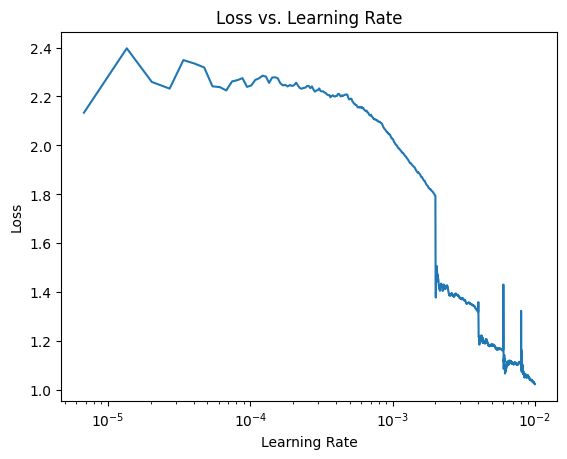

In [7]:
model.unfreeze()
model.lr_find(train_generator, validation_generator, epochs=5)

In [8]:
history = model.fit_epochs(train_generator, validation_generator, epochs=50, checkpoint_path='models/best_model_iteration_4.h5', lr=[9e-3, 1e-3])

Epoch 1/50
295/295 [==============================] - ETA: 0s - loss: 0.8767 - accuracy: 0.6986
Epoch 1: val_loss improved from inf to 0.97746, saving model to models/best_model_iteration_4.h5
295/295 [==============================] - 218s 736ms/step - loss: 0.8767 - accuracy: 0.6986 - val_loss: 0.9775 - val_accuracy: 0.7066
Training set
Epoch 2/50


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/295 [==============================] - ETA: 0s - loss: 0.7581 - accuracy: 0.7256
Epoch 2: val_loss improved from 0.97746 to 0.86814, saving model to models/best_model_iteration_4.h5
295/295 [==============================] - 251s 847ms/step - loss: 0.7581 - accuracy: 0.7256 - val_loss: 0.8681 - val_accuracy: 0.7350
Training set
Epoch 3/50
295/295 [==============================] - ETA: 0s - loss: 0.7087 - accuracy: 0.7374
Epoch 3: val_loss improved from 0.86814 to 0.85386, saving model to models/best_model_iteration_4.h5
295/295 [==============================] - 207s 700ms/step - loss: 0.7087 - accuracy: 0.7374 - val_loss: 0.8539 - val_accuracy: 0.7060
Training set
Epoch 4/50
295/295 [==============================] - ETA: 0s - loss: 0.6842 - accuracy: 0.7462
Epoch 4: val_loss improved from 0.85386 to 0.79900, saving model to models/best_model_iteration_4.h5
295/295 [==============================] - 220s 744ms/step - loss: 0.6842 - accuracy: 0.7462 - val_loss: 0.7990 - val_accura

['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
Balanced Accuracy: 0.6492901541419833
Accuracy on test set: 0.7615740895271301
F1 Score: 0.7691074411888535


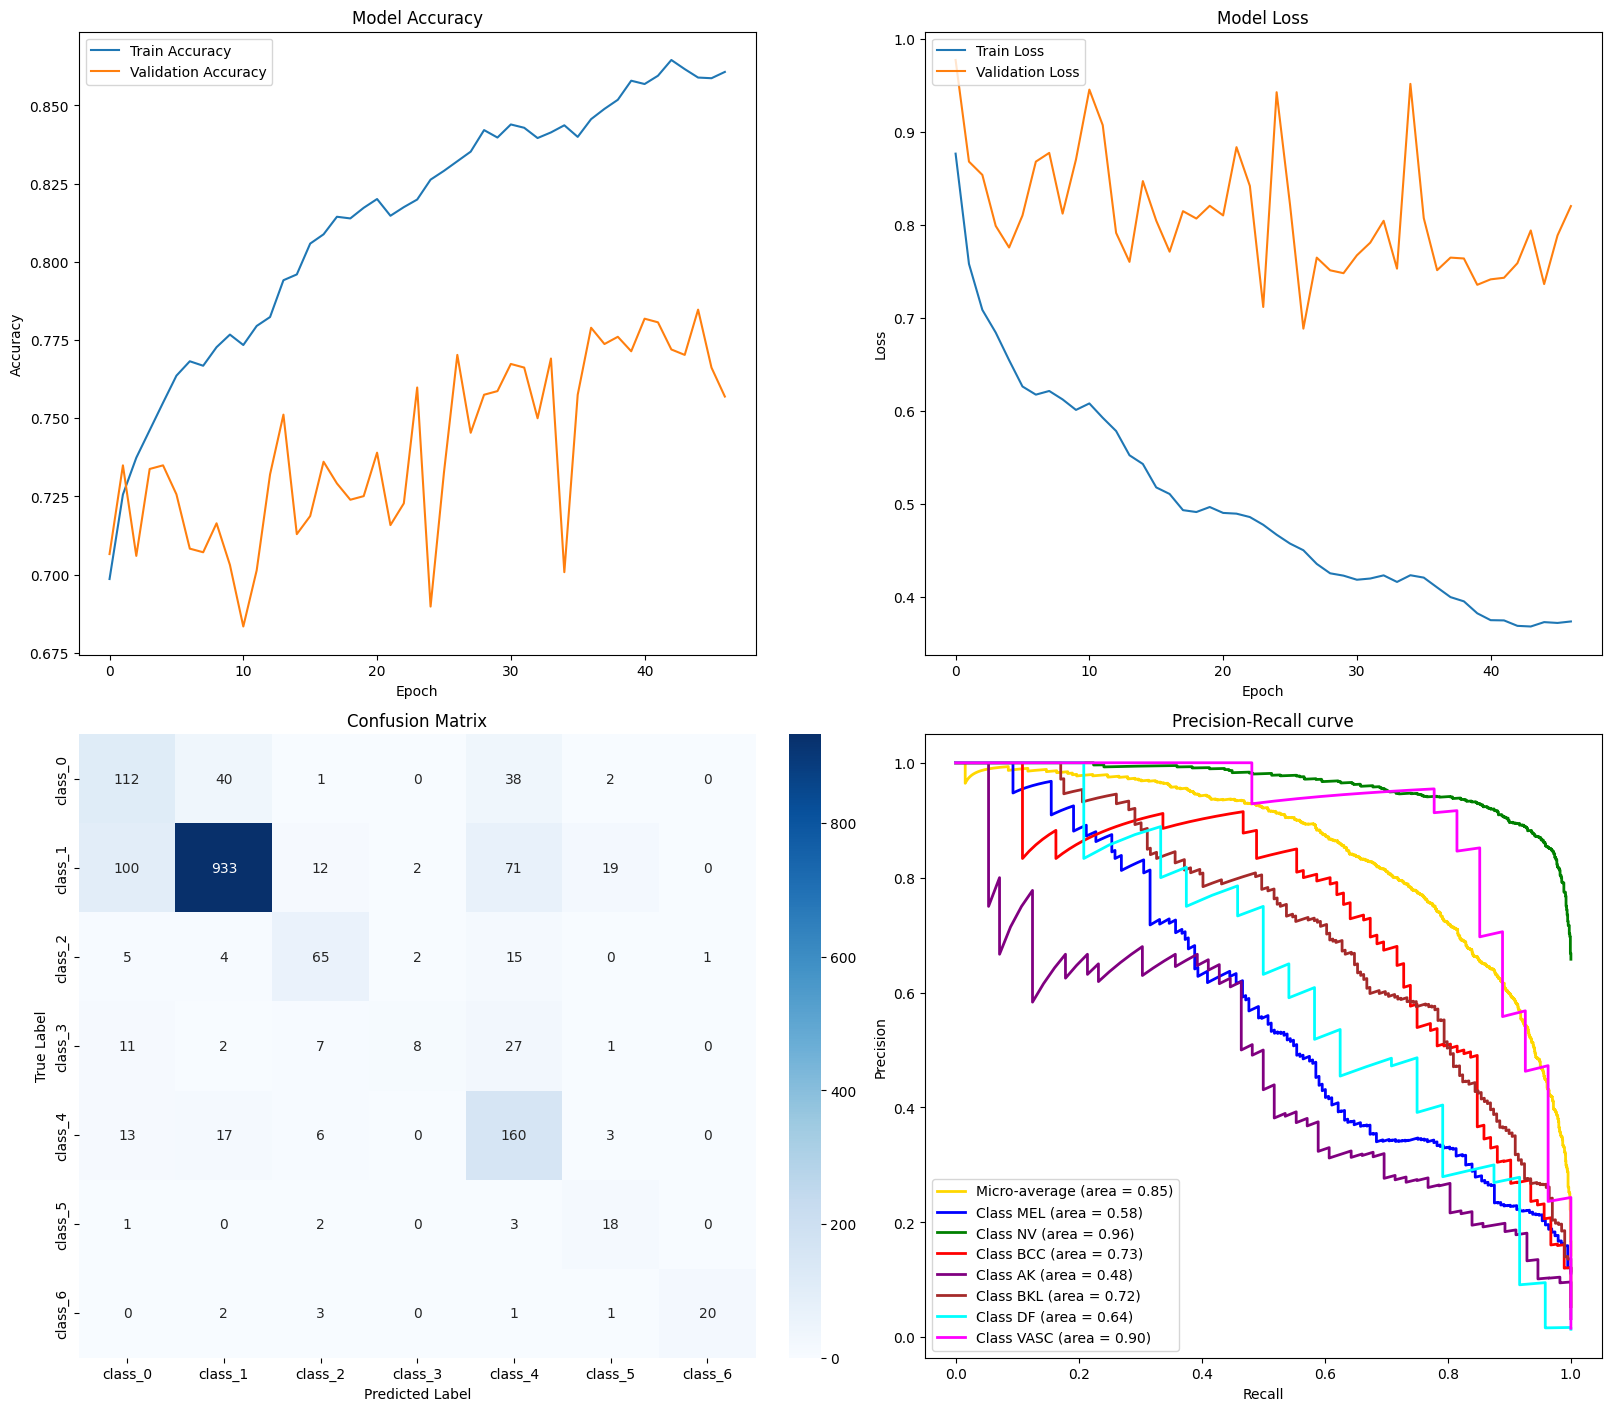

In [11]:
from tensorflow.keras.models import load_model

m = load_model('models/best_model_iteration_4.h5')

show_all_plots(history, m, test_generator)

# Iteration 4 (the real one)

Made our own dataloader that split the data set. Everything else should be normal.

In [1]:

from keras.applications.mobilenet_v3 import preprocess_input


# Now import HomemadeDataloader from homemade_dataloader.py
from homemade_dataloader import DataloaderFactory

data_dir = "../../Merge Set Ordered"
batch_size=64
dist = []
print(sum(dist))

factory = DataloaderFactory(data_dir, batch_size=batch_size, image_size=(224,224), set_distribution=(70,15,15), class_distribution=dist, preprocess_function=preprocess_input)

train_generator, validation_generator, test_generator = factory.get_dataloaders()

/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


0
Found 8202 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)
Found 1758 images belonging to 7 classes (dist says 0)


In [2]:
from homemade_model_iteration_4 import CustomModel

model = CustomModel(number_of_samples=train_generator.samples)
model.compile()

In [3]:
history = model.fit_epochs(train_generator, validation_generator, epochs=5, checkpoint_path='../../models/best_model_iteration_4.h5')

Epoch 1/5
128/128 [==============================] - ETA: 0s - loss: 1.3987 - accuracy: 0.6061
Epoch 1: val_loss improved from inf to 1.16258, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 87s 673ms/step - loss: 1.3987 - accuracy: 0.6061 - val_loss: 1.1626 - val_accuracy: 0.6429
Epoch 2/5


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/128 [==============================] - ETA: 0s - loss: 1.1172 - accuracy: 0.6545
Epoch 2: val_loss improved from 1.16258 to 1.05218, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 82s 641ms/step - loss: 1.1172 - accuracy: 0.6545 - val_loss: 1.0522 - val_accuracy: 0.6736
Epoch 3/5
128/128 [==============================] - ETA: 0s - loss: 1.0417 - accuracy: 0.6726
Epoch 3: val_loss improved from 1.05218 to 0.95619, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 77s 601ms/step - loss: 1.0417 - accuracy: 0.6726 - val_loss: 0.9562 - val_accuracy: 0.7095
Epoch 4/5
128/128 [==============================] - ETA: 0s - loss: 1.0195 - accuracy: 0.6763
Epoch 4: val_loss improved from 0.95619 to 0.94003, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 79s 617ms/step - loss: 1.0195 - accuracy: 0.6763 - val_loss: 0.9400 - val_accuracy: 0.7020
Ep

All layers have been unfrozen.
Epoch 1/10
128/128 [==============================] - 141s 1s/step - loss: 1.6582 - accuracy: 0.5520 - val_loss: 1.2260 - val_accuracy: 0.7049
Epoch 2/10
128/128 [==============================] - 148s 1s/step - loss: 1.3564 - accuracy: 0.6354 - val_loss: 1.4758 - val_accuracy: 0.6950
Epoch 3/10
128/128 [==============================] - 137s 1s/step - loss: 1.2870 - accuracy: 0.6464 - val_loss: 1.1857 - val_accuracy: 0.7054
Epoch 4/10
128/128 [==============================] - 123s 952ms/step - loss: 1.1632 - accuracy: 0.6664 - val_loss: 1.4629 - val_accuracy: 0.6956
Epoch 5/10
128/128 [==============================] - 127s 988ms/step - loss: 1.1119 - accuracy: 0.6813 - val_loss: 1.6900 - val_accuracy: 0.6997
Epoch 6/10
128/128 [==============================] - 139s 1s/step - loss: 1.0518 - accuracy: 0.6902 - val_loss: 1.3683 - val_accuracy: 0.7043
Epoch 7/10
128/128 [==============================] - 132s 1s/step - loss: 1.0026 - accuracy: 0.6893 - va

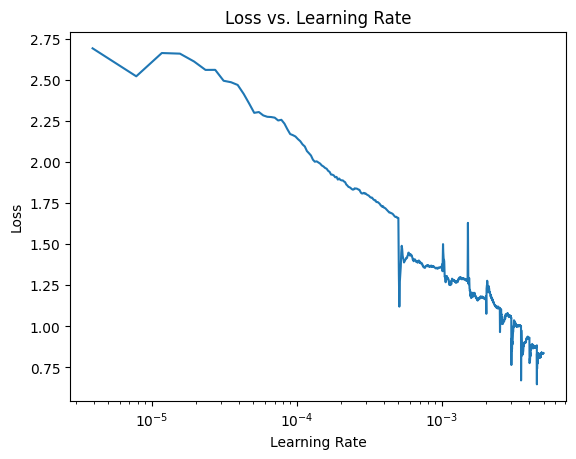

In [4]:
model.unfreeze()
model.lr_find(train_generator, validation_generator)

In [ ]:
history = model.fit_epochs(train_generator, 
        validation_generator, 
        epochs=50, 
        checkpoint_path='../../models/best_model_iteration_4.h5', 
        lr=[5e-4, 5e-3])

Epoch 1/50
128/128 [==============================] - ETA: 0s - loss: 0.7873 - accuracy: 0.7242
Epoch 1: val_loss improved from inf to 0.83296, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 139s 1s/step - loss: 0.7873 - accuracy: 0.7242 - val_loss: 0.8330 - val_accuracy: 0.7419
Epoch 2/50


/Users/sebastiangodske/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/128 [==============================] - ETA: 0s - loss: 0.7618 - accuracy: 0.7292
Epoch 2: val_loss improved from 0.83296 to 0.80602, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 135s 1s/step - loss: 0.7618 - accuracy: 0.7292 - val_loss: 0.8060 - val_accuracy: 0.7517
Epoch 3/50
128/128 [==============================] - ETA: 0s - loss: 0.7714 - accuracy: 0.7285
Epoch 3: val_loss improved from 0.80602 to 0.77561, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 122s 948ms/step - loss: 0.7714 - accuracy: 0.7285 - val_loss: 0.7756 - val_accuracy: 0.7593
Epoch 4/50
128/128 [==============================] - ETA: 0s - loss: 0.7388 - accuracy: 0.7350
Epoch 4: val_loss improved from 0.77561 to 0.76109, saving model to ../../models/best_model_iteration_4.h5
128/128 [==============================] - 114s 885ms/step - loss: 0.7388 - accuracy: 0.7350 - val_loss: 0.7611 - val_accuracy: 0.7598
